In [11]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
mnistDB=keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnistDB.load_data()
x_train=x_train.reshape((60000,28*28))
x_test=x_test.reshape((10000,28*28))
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
ml=keras.models.Sequential()
ml.add(keras.layers.Dense(units=50,activation='relu',input_shape=x_train.shape[1:]))
ml.add(keras.layers.Dense(units=100,activation='relu'))
ml.add(keras.layers.Dense(units=70,activation='relu'))
ml.add(keras.layers.Dense(units=10,activation='sigmoid'))
ml.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                39250     
                                                                 
 dense_5 (Dense)             (None, 100)               5100      
                                                                 
 dense_6 (Dense)             (None, 70)                7070      
                                                                 
 dense_7 (Dense)             (None, 10)                710       
                                                                 
Total params: 52,130
Trainable params: 52,130
Non-trainable params: 0
_________________________________________________________________


In [12]:
ml.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
ml.fit(x_train,y_train,epochs=1,batch_size=16)
test_loss,test_accuracy=ml.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1233 - accuracy: 0.9621


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Digit is [0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]


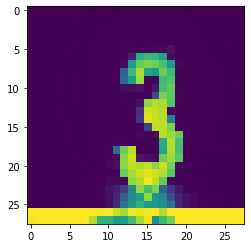

In [14]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
img=load_img('/content/three.jpg',grayscale=True,target_size=(28,28))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,28*28)
img=img.astype('float32')
digit=ml.predict(img)
print("Digit is",digit[0])